# Problem 1- Linear Regression
* Problem Statement
    * You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

## 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_P1= pd.read_csv('cubic_zirconia.csv')

In [3]:
df_P1.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


* Need to remove the unnamed column

### Check for duplicate values

In [4]:
print("Number of duplicate rows are", df_P1.duplicated().sum())

Number of duplicate rows are 0


* No duplicate rows

### Check for the shape of data

In [5]:
print("Number of rows are:", df_P1.shape[0], "\n""Number of columns are:",df_P1.shape[1])

Number of rows are: 26967 
Number of columns are: 11


In [6]:
# Data Information
df_P1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


* Null values present in feature 'depth'.
* Data type for features "carat", "depth", "table", "x", "y', "z" is float type.
* Data type for features "cut", "color", "clarity" is object type.
* Data type for feature " price" is int type.
* A column named "Unnamed: 0" is present which seems to be presenting serial numbers and will be required to be dropped for further analysis.


### Dropping the column "Unnamed: 0"

In [6]:
df_P1.drop("Unnamed: 0", axis=1, inplace = True)

###  Descriptive statistics

In [7]:
df_P1.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


* x,y and z have zero as minimum values.
* The mean for the data features is ranging from 0.798 for "carat" to 3939 for "price". So scaling the data might be required. 

### Check for unique number of values for each feature

In [15]:
print("The unique number of values present in each feature ;\n", df_P1.nunique())

The unique number of values present in each feature ;
 carat       257
cut           5
color         7
clarity       8
depth       169
table       112
x           531
y           526
z           356
price      8742
dtype: int64


In [25]:
# Unique values for categorical features
for i in df_P1[['cut','color','clarity']]:
    print(i,":")
    print(df_P1[i].value_counts(),'\n')

cut :
Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64 

color :
G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64 

clarity :
SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64 



### Getting Boxplots

Shape before Outliers Treatment (26967, 10)


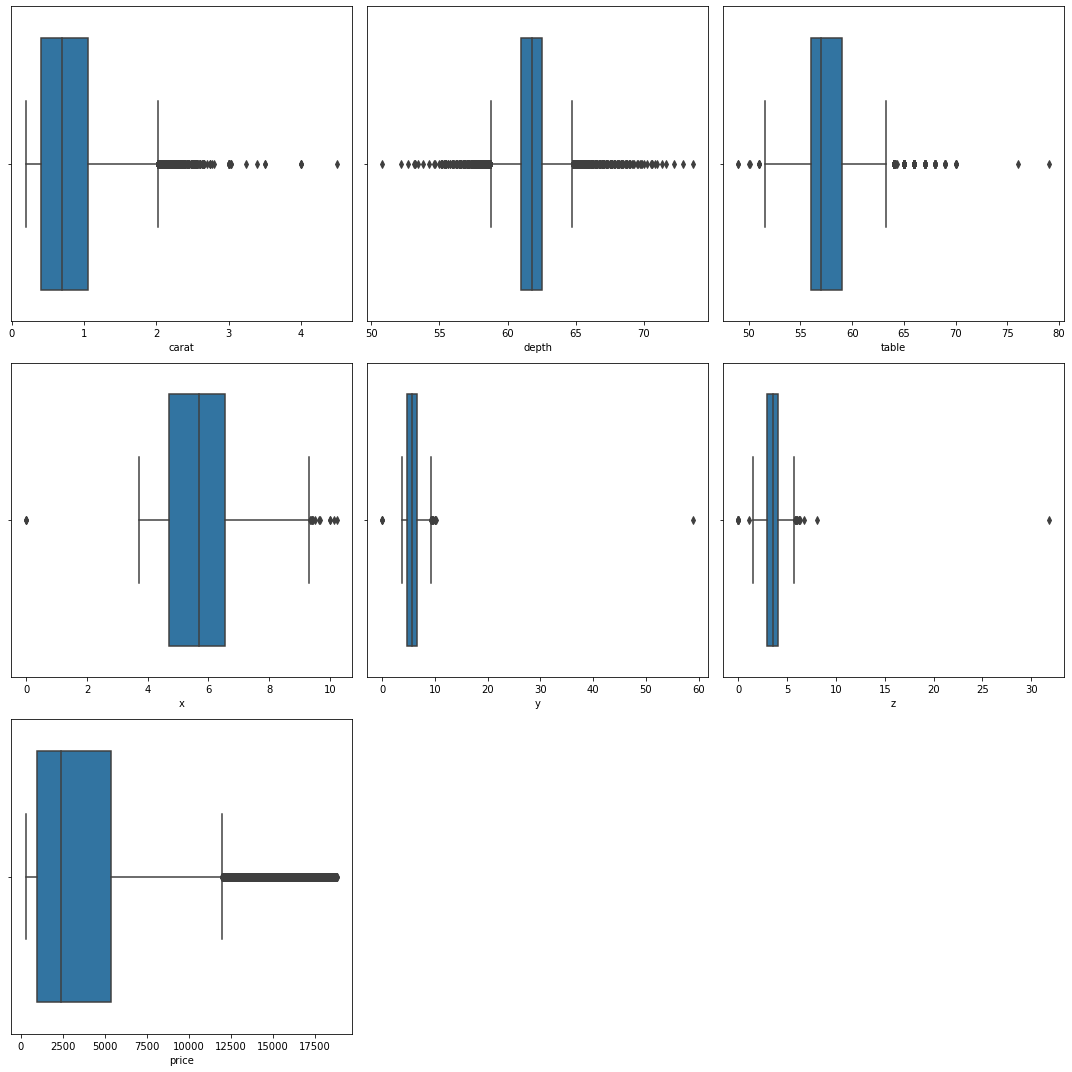

In [28]:
data_plot=df_P1[["carat", "depth", "table", "x", "y","z", "price"]]
fig=plt.figure(figsize=(15,15))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,3,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',df_P1.shape)

* Outliers present in all the features.

### Treating Outliers

In [29]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [30]:
for i in ["carat", "depth", "table", "x", "y","z", "price"]:
    lr,ur=remove_outlier(df_P1[i])
    df_P1[i]=np.where(df_P1[i]>ur,ur,df_P1[i])
    df_P1[i]=np.where(df_P1[i]<lr,lr,df_P1[i])    

### Boxplots after outlier treatment

Shape after Outliers Treatment (26967, 10)


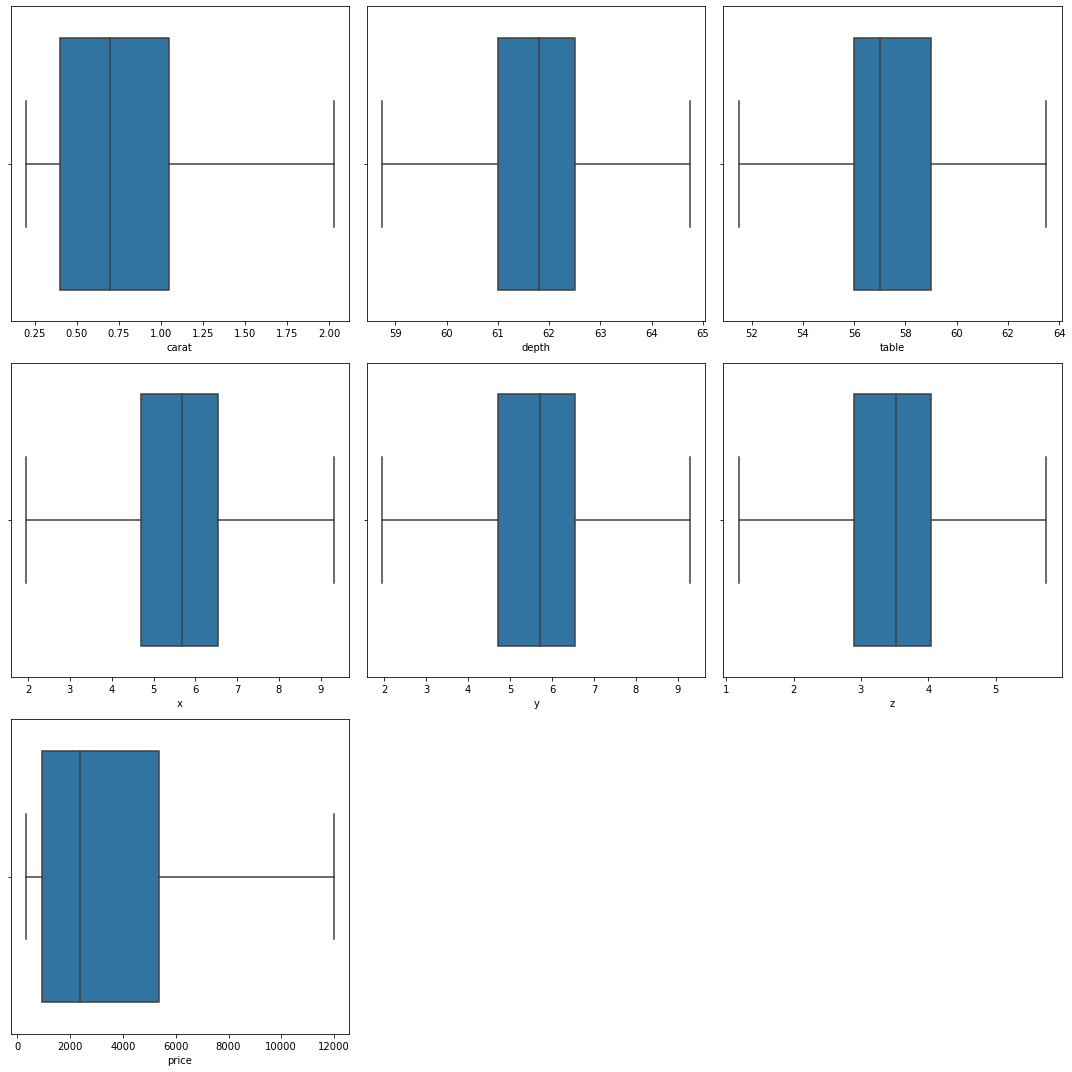

In [31]:
data_plot=df_P1[["carat", "depth", "table", "x", "y","z", "price"]]
fig=plt.figure(figsize=(15,15))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,3,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape after Outliers Treatment',df_P1.shape)

### Univariate Analysis

#### Getting histograms for numerical features

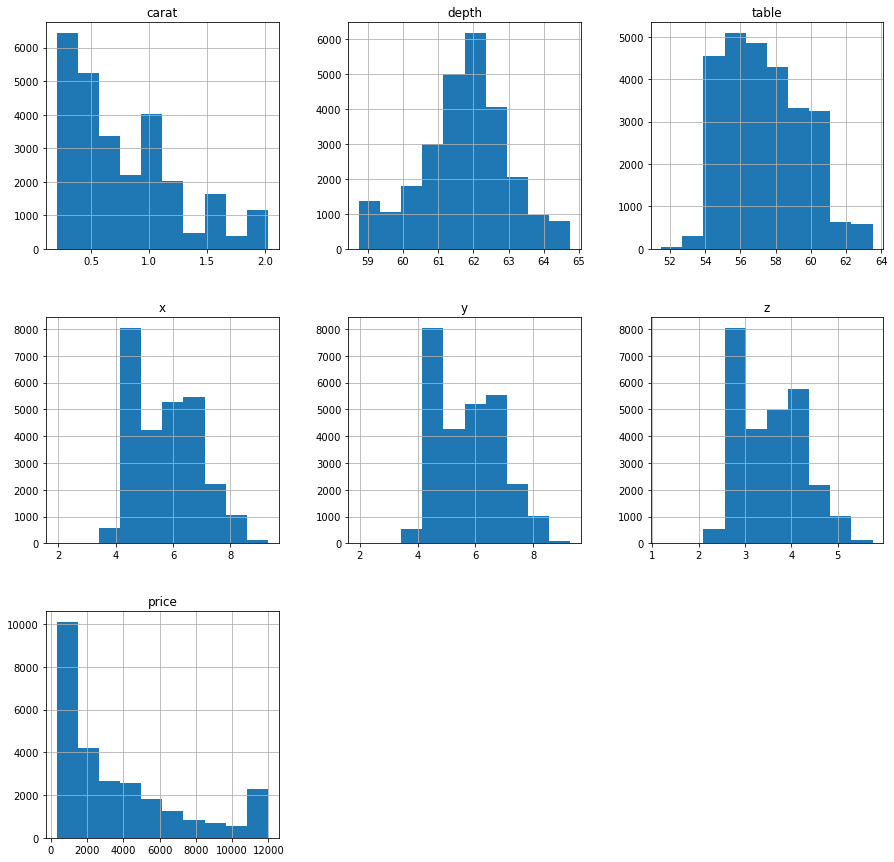

In [32]:
df_P1.hist(figsize=(15,15));

* "depth" seems to be normally distributed.

### Checking skewness

In [33]:
df_P1.skew()

carat    0.917096
depth   -0.227276
table    0.480441
x        0.394470
y        0.390750
z        0.384198
price    1.158126
dtype: float64

* All the features are right skewed except "depth"
* Price is highly right skewed.

### Getting countplots for object data type features

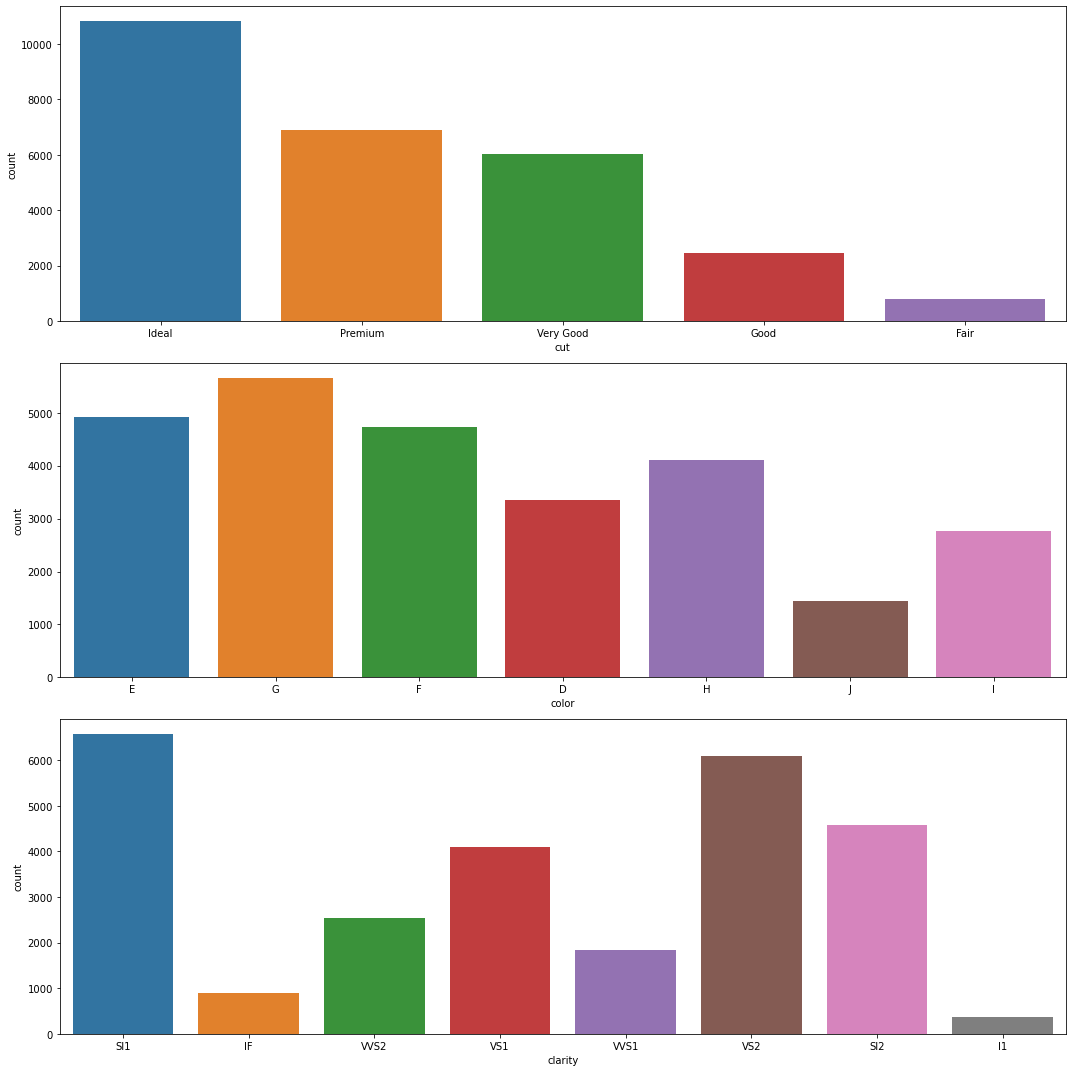

In [34]:
data_plot=df_P1[["cut", "color", "clarity"]]
fig=plt.figure(figsize=(15,15))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,1,i+1)
    sns.countplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

* Most of the Gem stones are in Ideal cut category.
* The color "G" has most number of counts.
* Most of the Gems have SI1 clarity


### Bivariate Analysis

#### Getting pairplots

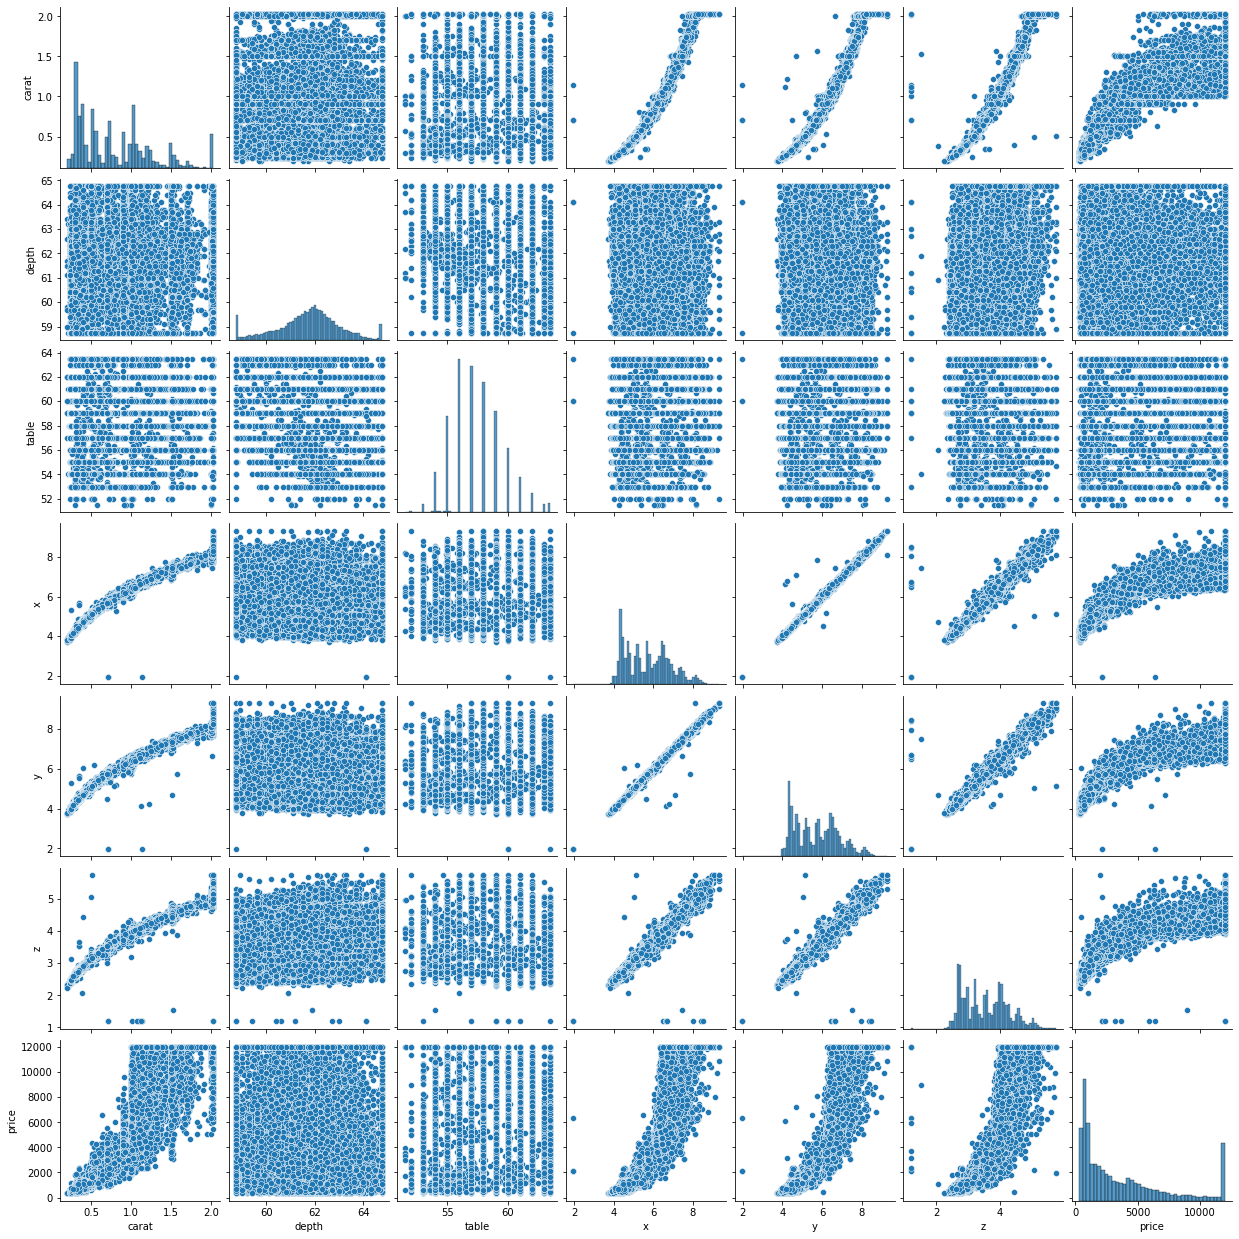

In [35]:
sns.pairplot(df_P1);

#### Following relations observed from pairplots;
* "carat" is nearly lineraly correlated to "x", "y","z"
* "x", "y" and "z" are in linear relationship wirth each other and with "price".
* "carat" and "price" seems to be in some relationship.


### Heatmap


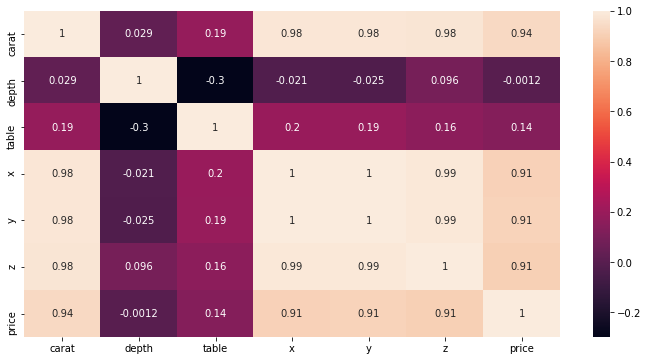

In [37]:
plt.figure(figsize=(12,6))
sns.heatmap(df_P1.corr(),annot=True);

* High correlation between features x, y,z, carat and price.

## 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

### Null value check

In [39]:
df_P1.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

* Total 697 null values exists in feature "depth"

### Imputing null values (with mean)

In [40]:
mean=df_P1["depth"].mean()
df_P1["depth"].replace(np.nan,mean,inplace=True)

In [41]:
df_P1.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

### Check for zero values

In [42]:
df_P1.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.793593,61.744151,57.435699,5.729903,5.731798,3.537261,3737.914136
std,0.462431,1.243601,2.157125,1.127023,1.118970,0.697278,3470.888236
min,0.200000,58.750000,51.500000,1.950000,1.965000,1.190000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,2.025000,64.750000,63.500000,9.310000,9.285000,5.750000,11982.500000


* Zero values were present in features "x", "y", "z" which have been removed after outlier treatment.
* It was necessary to remove zero values for "x", "y", "z" as they are dimensions of Gems and cannot be equal to zero. A gem is a 3-dimensional object and so none of the dimensions can be zero.
* Scaling is not required in Linear Regression model as there is no dominating effect of high valued variables.

## 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

### Encoding ( Coverting object type to int type)

In [43]:
for feature in df_P1.columns: 
    if df_P1[feature].dtype == 'object':
        df_P1[feature] = pd.Categorical(df_P1[feature]).codes

In [44]:
print("Data types of various features; \n",df_P1.dtypes)

Data types of various features; 
 carat      float64
cut           int8
color         int8
clarity       int8
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object


### Data spilt for train and test

In [45]:
x=df_P1.drop(['price'],axis=1) 
y=df_P1.price

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.30)

### Fitting the Linear Regression model

In [48]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

### Getting the coefficients for each of the independent attributes

In [51]:
for idx, col_name in enumerate (x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for carat is 9178.731772243324
The coefficient for cut is 41.949448260792906
The coefficient for color is -227.82266317498934
The coefficient for clarity is 249.40916977754387
The coefficient for depth is -89.83672554703207
The coefficient for table is -75.44523823244545
The coefficient for x is -2105.169309237706
The coefficient for y is 1600.4012374574677
The coefficient for z is -258.0724927544157


### Getting the intercept

In [52]:
intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 9678.206787459054


####  R-square of training data

In [53]:
print("R-square on training data is",regression_model.score(x_train, y_train))

R-square on training data is 0.9103490023581159


####  R-square of test data

In [54]:
print("R-square on training data is",regression_model.score(x_test, y_test))

R-square on training data is 0.907603046484971


#### RMSE of Training data

In [55]:
predicted_train=regression_model.fit(x_train, y_train).predict(x_train)
metrics.mean_squared_error(y_train,predicted_train,squared=False)

1041.4814857587908

#### RMSE of Test data

In [56]:
predicted_test=regression_model.fit(x_train, y_train).predict(x_test)
metrics.mean_squared_error(y_test,predicted_test,squared=False)

1049.6554312837923

## 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

### The final Linear Regression equation is;
* price = (9678.2) + (9178.7) * carat + (41.9) * cut + (-227.8) * color + (249.4) * clarity + (-89.8) * depth + (-75.4) * table + (-2105.1) * x + (1600.4) * y + (-258.0) * z

### Inferences;
* Three most important attributes are; "Carat", "y" and "x". The attribute "x" has negative impact on price i.e on increasing "x" the price decreases and vice-versa.
* From coefficients of different attributes it is clear that "carat" is the most important feature.
* The attributes having negative effect on price are "color", "depth", "table","z" and "x". So, the business is adviced to keep these attributes low to get high price of a gem.
* When "carat" increases by 1 unit, the price increase by 9178 units keeping all other attributes constant.

# Problem 2: Logistic Regression and LDA
* Problem Statement
    * You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

## 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import model_selection

In [58]:
df_P2= pd.read_csv('Holiday_Package.csv')

In [59]:
df_P2.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


* Need to remove the unnamed column

### Check for duplicate values

In [60]:
print("Number of duplicate rows are", df_P2.duplicated().sum())

Number of duplicate rows are 0


* No duplicate rows

### Check for the shape of data

In [61]:
print("Number of rows are:", df_P1.shape[0], "\n""Number of columns are:",df_P2.shape[1])

Number of rows are: 26967 
Number of columns are: 8


In [62]:
# Data Information
df_P2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


* No  null values in data
* All the variables are int type except "Holliday_Package" and "foreign"           

#### Dropping the column "Unnamed: 0"

In [63]:
df_P2.drop("Unnamed: 0", axis=1, inplace = True)

### Descriptive statistics

In [65]:
df_P2.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


* The standard deviation of salary is high.
* Age is ranging from 20 to 62 years.

### Null value check

In [66]:
df_P2.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

* There are no null values in data set

### Check for unique number of values for each feature

In [67]:
print("The unique number of values present in each feature ;","\n",df_P2.nunique())

The unique number of values present in each feature ; 
 Holliday_Package       2
Salary               864
age                   43
educ                  20
no_young_children      4
no_older_children      7
foreign                2
dtype: int64


In [69]:
# Unique values for categorical features
for i in df_P2[['Holliday_Package','educ','no_young_children','no_older_children','foreign']]:
    print(i,":")
    print(df_P2[i].value_counts(),'\n')

Holliday_Package :
no     471
yes    401
Name: Holliday_Package, dtype: int64 

educ :
8     157
12    124
9     114
11    100
10     90
5      67
4      50
13     43
7      31
14     25
6      21
15     15
3      11
16     10
2       6
17      3
19      2
1       1
18      1
21      1
Name: educ, dtype: int64 

no_young_children :
0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64 

no_older_children :
0    393
2    208
1    198
3     55
4     14
5      2
6      2
Name: no_older_children, dtype: int64 

foreign :
no     656
yes    216
Name: foreign, dtype: int64 



* Following features are int data type but they are categorical and should be treated accordingly:
    * no_young_children
    * no_older_children
    * educ

### Univariate Analysis

#### Getting Boxplots

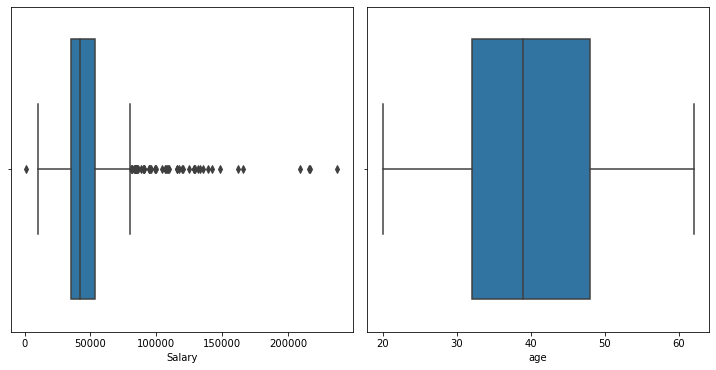

In [73]:
data_plot=df_P2[['Salary', 'age']]
fig=plt.figure(figsize=(15,15))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,3,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()


* Outliers present in Salary variable

### Getting histograms 


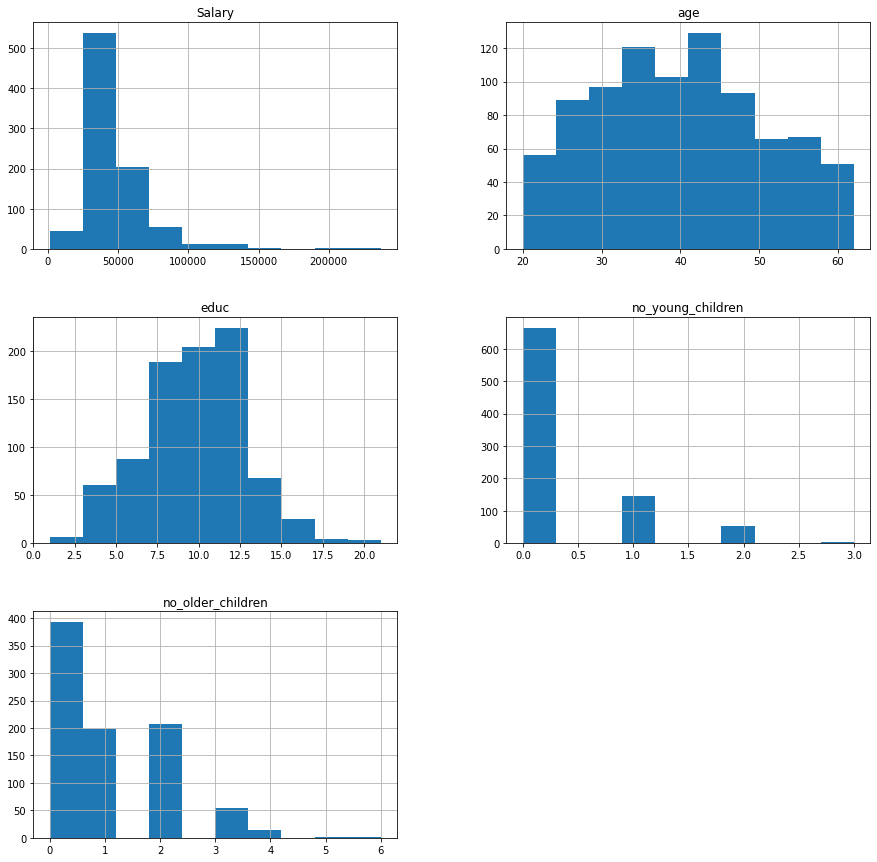

In [71]:
df_P2.hist(figsize=(15,15));

* "educ" seems to be normally distributed.

### Checking skewness

In [74]:
df_P2[['Salary','age']].skew()

Salary    3.103216
age       0.146412
dtype: float64

* Salary is positively skewed

### Getting countplots for object data type features

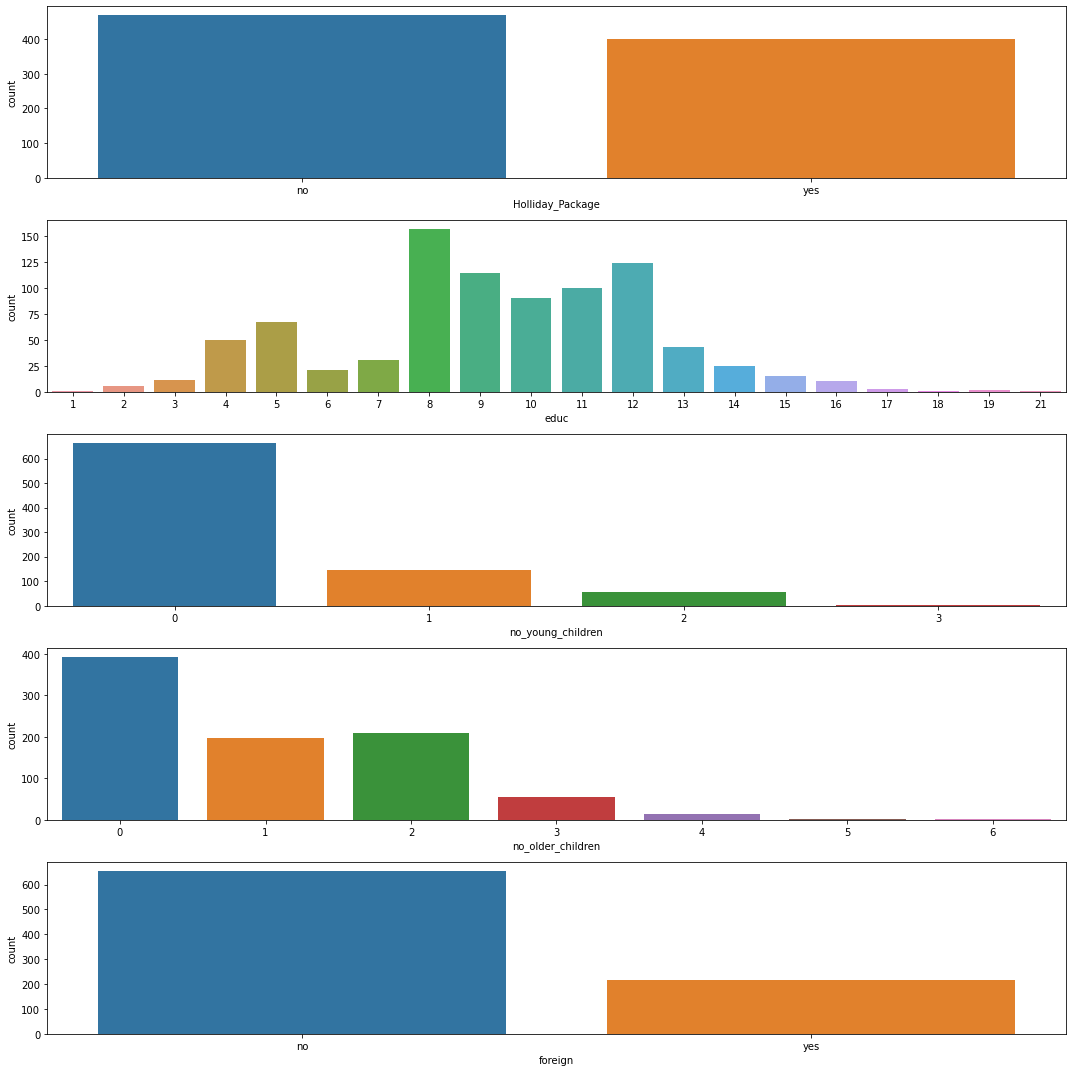

In [78]:
data_plot=df_P2.drop(['Salary','age'],axis=1)
fig=plt.figure(figsize=(15,15))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(5,1,i+1)
    sns.countplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

* The number of employees not opted for package is more then who opted.
* Less number of foreigners.

### Bivariate Analysis

#### Getting pairplots

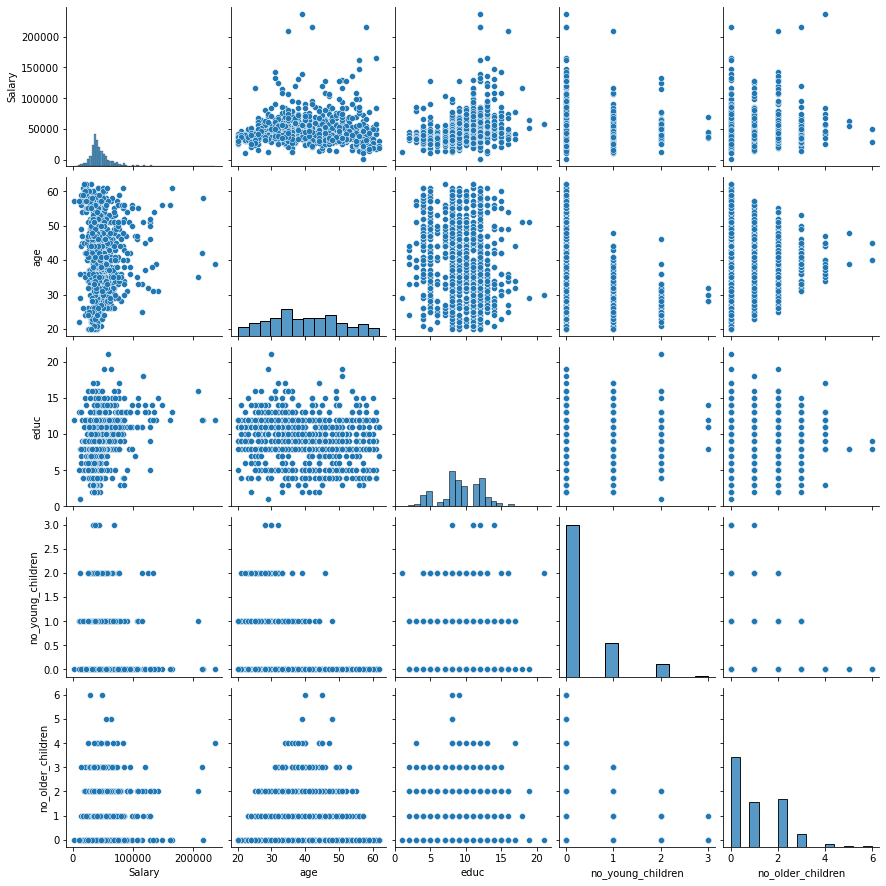

In [79]:
sns.pairplot(df_P2);

* None of the variable seems to be correlated

### Heatmap

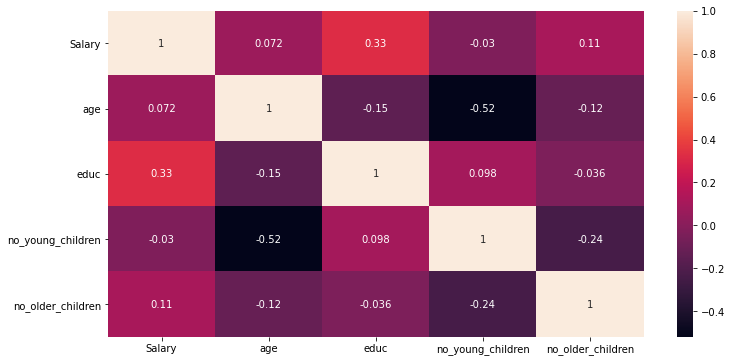

In [80]:
plt.figure(figsize=(12,6))
sns.heatmap(df_P2.corr(),annot=True);

* No remarkable correlation found between variables.


## 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

### Encoding the data

In [81]:
for feature in df_P2.drop(['Salary','age'],axis=1).columns: 
    df_P2[feature] = pd.Categorical(df_P2[feature]).codes

In [82]:
df_P2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Holliday_Package   872 non-null    int8 
 1   Salary             872 non-null    int64
 2   age                872 non-null    int64
 3   educ               872 non-null    int8 
 4   no_young_children  872 non-null    int8 
 5   no_older_children  872 non-null    int8 
 6   foreign            872 non-null    int8 
dtypes: int64(2), int8(5)
memory usage: 18.0 KB


### Data spilt for train and test

In [84]:
X=df_P2.drop(['Holliday_Package'],axis=1) 
Y=df_P2.Holliday_Package

In [85]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=1,test_size=0.30)

### Applying Logistic Regression

In [86]:
model_LR = LogisticRegression()
model_LR.fit(X_train,Y_train)

LogisticRegression()

### Applying LDA (linear discriminant analysis).

In [87]:
model_LDA = LinearDiscriminantAnalysis()
model_LDA.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

## 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

### Predicting on Training and Test dataset

In [88]:
ytrain_predict_LR = model_LR.predict(X_train)
ytest_predict_LR = model_LR.predict(X_test)

ytrain_predict_LDA = model_LDA.predict(X_train)
ytest_predict_LDA = model_LDA.predict(X_test)

### Getting the Predicted Classes and Probs

In [89]:
ytest_predict_prob_LR=model_LR.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_LR).head()

,0,1
0,0.627989,0.372011
1,0.518199,0.481801
2,0.559476,0.440524
3,0.727142,0.272858
4,0.505669,0.494331


In [90]:
ytest_predict_prob_LDA=model_LDA.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_LDA).head()

,0,1
0,0.736132,0.263868
1,0.278019,0.721981
2,0.887254,0.112746
3,0.967770,0.032230
4,0.523117,0.476883


### Model Evaluation

In [130]:
from sklearn.metrics import accuracy_score

In [132]:
accuracy_score(Y_train,ytrain_predict_LR)

0.521311475409836

In [91]:
# Accuracy - Training Data for LR
model_LR.score(X_train, Y_train)

0.521311475409836

In [92]:
# Accuracy - Training Data for LDA
model_LDA.score(X_train, Y_train)

0.6721311475409836

### AUC and ROC for the training data - LR

AUC: 0.567


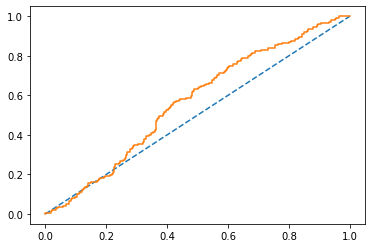

In [93]:
# predict probabilities
probs_LR = model_LR.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_LR = probs_LR[:, 1]
# calculate AUC
auc_LR = roc_auc_score(Y_train, probs_LR)
print('AUC: %.3f' % auc_LR)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs_LR)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the training data - LDA

AUC: 0.742


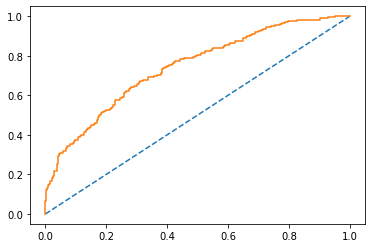

In [94]:
# predict probabilities
probs_LDA = model_LDA.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_LDA = probs_LDA[:, 1]
# calculate AUC
auc_LDA = roc_auc_score(Y_train, probs_LDA)
print('AUC: %.3f' % auc_LDA)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs_LDA)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data -LR

AUC: 0.567


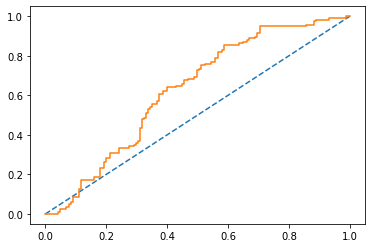

In [95]:
# predict probabilities
probs_LR = model_LR.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_LR = probs_LR[:, 1]
# calculate AUC
test_auc_LR = roc_auc_score(Y_test, probs_LR)
print('AUC: %.3f' % auc_LR)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_LR)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### AUC and ROC for the test data -LDA

AUC: 0.742


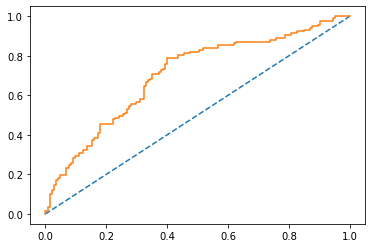

In [96]:
# predict probabilities
probs_LDA = model_LDA.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_LDA = probs_LDA[:, 1]
# calculate AUC
test_auc_LDA = roc_auc_score(Y_test, probs_LDA)
print('AUC: %.3f' % auc_LDA)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_LDA)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the training data-LR

In [97]:
confusion_matrix(Y_train,ytrain_predict_LR)

array([[295,  31],
       [261,  23]], dtype=int64)

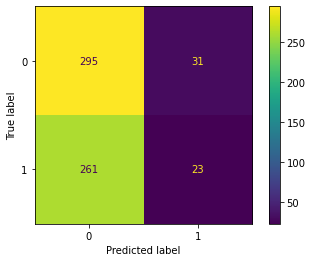

In [98]:
plot_confusion_matrix(model_LR,X_train,Y_train)

### Confusion Matrix for the training data-LDA

In [99]:
confusion_matrix(Y_train, ytrain_predict_LDA)

array([[252,  74],
       [126, 158]], dtype=int64)

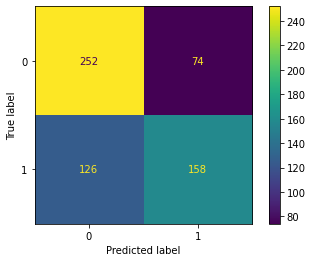

In [100]:
plot_confusion_matrix(model_LDA,X_train,Y_train);

### Confusion Matrix for the training data-LR

In [101]:
confusion_matrix(Y_test, ytest_predict_LR)

array([[132,  13],
       [107,  10]], dtype=int64)

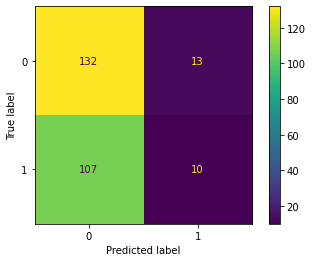

In [102]:
plot_confusion_matrix(model_LR,X_test,Y_test);

### Confusion Matrix for the training data-LDA

In [103]:
confusion_matrix(Y_test, ytest_predict_LDA)

array([[103,  42],
       [ 52,  65]], dtype=int64)

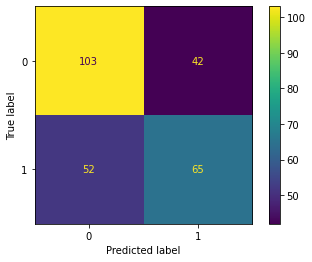

In [104]:
plot_confusion_matrix(model_LDA,X_test,Y_test);

### Comparisions of both models
* Model accuracy of LDA model is better than Logestic Regression model
* AUC is better for LDA than Logestic Regression model


## 2.4 Inference: Basis on these predictions, what are the insights and recommendations. Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

In [125]:
pd.DataFrame({'Features':model_LDA.feature_names_in_,'Coef':model_LDA.coef_.ravel()}).sort_values('Coef', ascending=False)

,Features,Coef
5,foreign,1.624836
2,educ,0.076336
0,Salary,-0.000015
4,no_older_children,-0.046282
1,age,-0.054275
3,no_young_children,-1.427985


### Insights and Recommendations
* The Linear Discriminant Ananlysis is providing better results than Linear Regression model.
* As per our final model, the most important features are 'foreign' and 'no_young_children'
* So, company should focus on foreign tourists.
* Also, the people with less number of young children shall be targeted.
* More Educated and less aged people shall also be considered as per our model. 

# Thanks!!!!!!!!